### みんなのPython勉強会 #42
# pandasの全体象を知る
### 辻 真吾（@tsjshg）2/13, 2019

# 自己紹介
- 1975年　東京都足立区出身
- 駒場IIキャンパスにある東大先端科学技術研究センターに勤務
- 工学部計数工学科、ITベンチャー、バイオインフォマティクス、路頭
- Stapyの活動は3年ちょっと。いつもありがとうございます。
- www.tsjshg.info

多変数のロジステック回帰をライブラリ無しでやってみるという記事を書きました。(2/18発売）

コードだけGithubにあります。　https://github.com/tsjshg/sd201903

<img src="SD201903.jpg">

# pandas

Pythonでデータサイエンスをするときに必須のライブラリ。

本日は、その全体象をコードメインで紹介します。

In [1]:
# pdと略されることが多い
import pandas as pd

In [2]:
# 辞書で渡すと列ごとに
df = pd.DataFrame({'col_0': [1,2,3], 'col_1': [10,20,30]}, index=['row_0', 'row_1', 'row_2'])
df

col_0  col_1
row_0      1     10
row_1      2     20
row_2      3     30

In [3]:
# リストで渡すと行ごとに
df = pd.DataFrame([[1,10], [2,20], [3,30]], columns=['col_0', 'col_1'], index=['row_0', 'row_1', 'row_2'])
df

col_0  col_1
row_0      1     10
row_1      2     20
row_2      3     30

In [4]:
# （行数、列数）
df.shape

(3, 2)

In [5]:
df.columns

Index(['col_0', 'col_1'], dtype='object')

In [6]:
df.columns[0] = 'COL_0'

TypeError: Index does not support mutable operations

In [7]:
# 全体を1度に変更するのは可能
df.columns = ['col_0', 'col_1']

In [8]:
#　個別に変えたかったらrename
df.rename(columns={'col_0': 'COL_0'})

COL_0  col_1
row_0      1     10
row_1      2     20
row_2      3     30

In [10]:
# 行の名前
df.index

Index(['row_0', 'row_1', 'row_2'], dtype='object')

In [11]:
# numpy.ndarray
df.values

array([[ 1, 10],
       [ 2, 20],
       [ 3, 30]])

In [12]:
# 普通にやると列　（行がサンプル、列が説明変数）
df['col_0']

row_0    1
row_1    2
row_2    3
Name: col_0, dtype: int64

In [13]:
# 行を名前で指定
df.loc['row_0']

col_0     1
col_1    10
Name: row_0, dtype: int64

In [14]:
df.loc['row_0',:]

col_0     1
col_1    10
Name: row_0, dtype: int64

In [15]:
df.loc[:, 'col_1']

row_0    10
row_1    20
row_2    30
Name: col_1, dtype: int64

In [16]:
df.loc['row_0', 'col_0']

1

In [17]:
# 添え字でアクセスしたいときは、iloc
df.iloc[1,0]

2

In [18]:
df.iloc[1]

col_0     2
col_1    20
Name: row_1, dtype: int64

In [19]:
df.iloc[1,:]

col_0     2
col_1    20
Name: row_1, dtype: int64

In [20]:
#　集計のための関数多数
df.sum()

col_0     6
col_1    60
dtype: int64

In [21]:
# axis=0は行方向へ計算が進む意味
df.sum(axis=0)

col_0     6
col_1    60
dtype: int64

In [22]:
df.sum(axis=1)

row_0    11
row_1    22
row_2    33
dtype: int64

In [23]:
df.mean() # 平均

df.median() # 中央値

df.std() #　標準偏差

df.var()  # 分散

col_0      1.0
col_1    100.0
dtype: float64

In [24]:
df

col_0  col_1
row_0      1     10
row_1      2     20
row_2      3     30

In [26]:
# 新たな列の追加
df['col_2'] = [100, 200, 300]

In [27]:
df

col_0  col_1  col_2
row_0      1     10    100
row_1      2     20    200
row_2      3     30    300

In [28]:
#　計算結果の追加
df['sum'] = df.sum(1)
df

col_0  col_1  col_2  sum
row_0      1     10    100  111
row_1      2     20    200  222
row_2      3     30    300  333

In [29]:
#　列同士の計算もOK
df['col_2/col_0'] = df['col_2'] / df['col_0']
df

col_0  col_1  col_2  sum  col_2/col_0
row_0      1     10    100  111        100.0
row_1      2     20    200  222        100.0
row_2      3     30    300  333        100.0

In [30]:
# 行や列をまとめて消せます
df.drop(['sum', 'col_2/col_0'], axis=1)

col_0  col_1  col_2
row_0      1     10    100
row_1      2     20    200
row_2      3     30    300

In [31]:
# 破壊的な方が良い場合は、inplace=True
df.drop(['sum', 'col_2/col_0'], axis=1, inplace=True)

In [32]:
df

col_0  col_1  col_2
row_0      1     10    100
row_1      2     20    200
row_2      3     30    300

In [33]:
# 昔はsortだった。
df.sort_values(by='col_2', ascending=False)

col_0  col_1  col_2
row_2      3     30    300
row_1      2     20    200
row_0      1     10    100

In [34]:
# 複数の列を指定することも可能
df.sort_values(by=['col_0', 'col_1'])

col_0  col_1  col_2
row_0      1     10    100
row_1      2     20    200
row_2      3     30    300

In [35]:
# 行の名前でソートしたいとき。
df.sort_index(ascending=False)

col_0  col_1  col_2
row_2      3     30    300
row_1      2     20    200
row_0      1     10    100

In [36]:
# 値の評価
df > 20

col_0  col_1  col_2
row_0  False  False   True
row_1  False  False   True
row_2  False   True   True

In [37]:
df_with_nan = df[df > 20]
df_with_nan

col_0  col_1  col_2
row_0    NaN    NaN    100
row_1    NaN    NaN    200
row_2    NaN   30.0    300

In [38]:
# NaNはNot a Number　「数字じゃない」の意味
import numpy as np
type(np.nan)

float

In [39]:
np.nan == np.nan

False

In [40]:
df_with_nan

col_0  col_1  col_2
row_0    NaN    NaN    100
row_1    NaN    NaN    200
row_2    NaN   30.0    300

In [46]:
df_with_nan.iloc[0,0] == df_with_nan.iloc[0,1]

False

In [47]:
# None は何もないというシングルトン
None == None

True

In [48]:
if None:
    print('なにも無い')

if np.nan:
    print('数字ではないものがある')

数字ではないものがある


In [49]:
val = np.nan

if val == np.nan:
    print('これではダメ')

if np.isnan(val):
    print('NaNだとわかる')

NaNだとわかる


In [51]:
df_with_nan

col_0  col_1  col_2
row_0    NaN    NaN    100
row_1    NaN    NaN    200
row_2    NaN   30.0    300

In [50]:
df_with_nan.isna()

col_0  col_1  col_2
row_0   True   True  False
row_1   True   True  False
row_2   True  False  False

In [52]:
df_with_nan.dropna()

Empty DataFrame
Columns: [col_0, col_1, col_2]
Index: []

In [53]:
df_with_nan.dropna(how='all', axis=1)

col_1  col_2
row_0    NaN    100
row_1    NaN    200
row_2   30.0    300

In [54]:
df_with_nan.fillna(0)

col_0  col_1  col_2
row_0    0.0    0.0    100
row_1    0.0    0.0    200
row_2    0.0   30.0    300

In [55]:
# 破壊的
df_with_nan[df_with_nan.isna()] = 0
df_with_nan

col_0  col_1  col_2
row_0    0.0    0.0    100
row_1    0.0    0.0    200
row_2    0.0   30.0    300

In [56]:
# 2行目だけをとってくる
idx = [False, True, False]
df[idx]

col_0  col_1  col_2
row_1      2     20    200

In [57]:
df['col_0'] <= 2

row_0     True
row_1     True
row_2    False
Name: col_0, dtype: bool

In [58]:
# 3で割り切れる
df['col_0'] % 3 == 0

row_0    False
row_1    False
row_2     True
Name: col_0, dtype: bool

In [59]:
df[df['col_0'] % 3 == 0]

col_0  col_1  col_2
row_2      3     30    300

In [60]:
# SQL文のように書ける
df.query('col_0 >=2 and col_2 > 200')

col_0  col_1  col_2
row_2      3     30    300

In [61]:
# 行や列ごとに計算したいとき。for文は使わない
def what(x):
    return type(x)

df.apply(what)

col_0    <class 'pandas.core.series.Series'>
col_1    <class 'pandas.core.series.Series'>
col_2    <class 'pandas.core.series.Series'>
dtype: object

In [62]:
df.apply(what, axis=1)

row_0    <class 'pandas.core.series.Series'>
row_1    <class 'pandas.core.series.Series'>
row_2    <class 'pandas.core.series.Series'>
dtype: object

In [66]:
df

col_0  col_1  col_2
row_0      1     10    100
row_1      2     20    200
row_2      3     30    300

In [67]:
# 無名関数が便利
df.apply(lambda x: x.sum(), axis=1)

row_0    111
row_1    222
row_2    333
dtype: int64

In [68]:
# Series全体への計算
df.apply(lambda x: x * 2)

col_0  col_1  col_2
row_0      2     20    200
row_1      4     40    400
row_2      6     60    600

In [69]:
# 普通はこうする
df * 2

col_0  col_1  col_2
row_0      2     20    200
row_1      4     40    400
row_2      6     60    600

In [95]:
# 個別の要素へ関数を適用
import random
df.applymap(lambda x: random.randint(1,x))

col_0  col_1  col_2
row_0      1      9     96
row_1      2     16    123
row_2      3      6     34

In [71]:
# Series型には、mapがある
df['col_0'].map(lambda x: f'val = {x}')

row_0    val = 1
row_1    val = 2
row_2    val = 3
Name: col_0, dtype: object

メソッドの名前と引数

- DataFrame.apply 行または列ごと
- DataFrame.applymap 個別の要素
- Series.map 個別の要素

apply使うより、mapの方が速いらしい

https://shinyorke.hatenablog.com/entry/pandas-tips#map%E3%81%A7%E6%9B%B8%E3%81%8D%E7%9B%B4%E3%81%99

In [73]:
# CSVへ保存
df.to_csv('sample.csv')

In [74]:
!cat sample.csv

,col_0,col_1,col_2
row_0,1,10,100
row_1,2,20,200
row_2,3,30,300


In [75]:
pd.read_csv('sample.csv', index_col=0)

col_0  col_1  col_2
row_0      1     10    100
row_1      2     20    200
row_2      3     30    300

In [76]:
df.to_excel('sample.xlsx')

In [77]:
pd.read_excel('sample.xlsx')

col_0  col_1  col_2
row_0      1     10    100
row_1      2     20    200
row_2      3     30    300

In [78]:
df.to_pickle('sample.pkl')

In [79]:
pd.read_pickle('sample.pkl')

col_0  col_1  col_2
row_0      1     10    100
row_1      2     20    200
row_2      3     30    300

In [80]:
# サンプルデータのロード

from sklearn.datasets import load_iris
iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.shape

(150, 5)

In [81]:
# データの先頭部分 sepal（萼）、petal(花弁)
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [82]:
iris_df.tail()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
145       2  
146       2  
147       2  
148       2  
149       2

In [83]:
iris_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

In [84]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


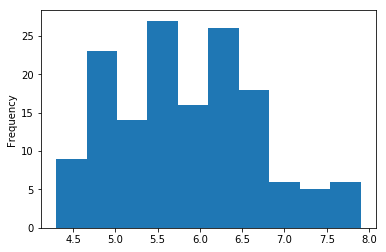

In [86]:
%matplotlib inline
iris_df['sepal length (cm)'].plot(kind='hist')

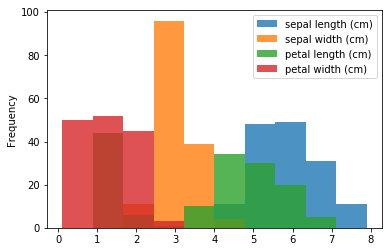

In [87]:
iris_df.iloc[:,:4].plot(kind='hist', alpha=0.8)

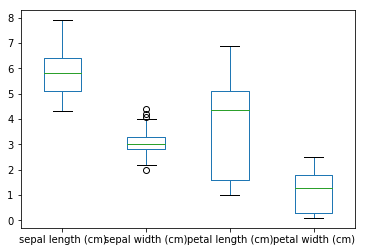

In [88]:
iris_df.iloc[:,:4].plot(kind='box')

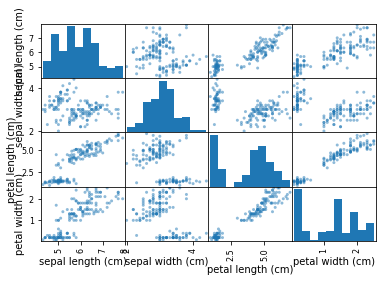

In [89]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(iris_df.iloc[:, :4])

In [90]:
iris_df.sample(10)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
124                6.7               3.3                5.7               2.1   
90                 5.5               2.6                4.4               1.2   
45                 4.8               3.0                1.4               0.3   
65                 6.7               3.1                4.4               1.4   
54                 6.5               2.8                4.6               1.5   
69                 5.6               2.5                3.9               1.1   
44                 5.1               3.8                1.9               0.4   
93                 5.0               2.3                3.3               1.0   
58                 6.6               2.9                4.6               1.3   
29                 4.7               3.2                1.6               0.2   

     target  
124       2  
90        1  
45        0  
65        1  
54        1  
69        1  
44        0  
93        1  
58        1  
29        0

In [91]:
gr = iris_df.groupby('target')

In [92]:
gr.get_group(0)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
6                 4.6               3.4                1.4               0.3   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
9                 4.9               3.1                1.5               0.1   
10                5.4               3.7                1.5               0.2   
11                4.8               3.4                1.6               0.2   
12                4.8               3.0                1.4               0.1   
13                4.3               3.0                1.1               0.1   
14                5.8               4.0                1.2               0.2   
15                5.7               4.4                1.5               0.4   
16                5.4               3.9                1.3               0.4   
17                5.1               3.5                1.4               0.3   
18                5.7               3.8                1.7               0.3   
19                5.1               3.8                1.5               0.3   
20                5.4               3.4                1.7               0.2   
21                5.1               3.7                1.5               0.4   
22                4.6               3.6                1.0               0.2   
23                5.1               3.3                1.7               0.5   
24                4.8               3.4                1.9               0.2   
25                5.0               3.0                1.6               0.2   
26                5.0               3.4                1.6               0.4   
27                5.2               3.5                1.5               0.2   
28                5.2               3.4                1.4               0.2   
29                4.7               3.2                1.6               0.2   
30                4.8               3.1                1.6               0.2   
31                5.4               3.4                1.5               0.4   
32                5.2               4.1                1.5               0.1   
33                5.5               4.2                1.4               0.2   
34                4.9               3.1                1.5               0.2   
35                5.0               3.2                1.2               0.2   
36                5.5               3.5                1.3               0.2   
37                4.9               3.6                1.4               0.1   
38                4.4               3.0                1.3               0.2   
39                5.1               3.4                1.5               0.2   
40                5.0               3.5                1.3               0.3   
41                4.5               2.3                1.3               0.3   
42                4.4               3.2                1.3               0.2   
43                5.0               3.5                1.6               0.6   
44                5.1               3.8                1.9               0.4   
45                4.8               3.0                1.4               0.3   
46                5.1               3.8                1.6               0.2   
47                4.6               3.2                1.4               0.2   
48                5.3               3.7                1.5               0.2   
49  

In [93]:
gr.apply(lambda x: x['sepal length (cm)'].mean())

target
0    5.006
1    5.936
2    6.588
dtype: float64

# まとめ

- pandasの基本的な機能を紹介
- 時系列データの扱いも得意
- 開発がスピードが速く、APIの変更がよくある
- Excelを禁止すると上達する？（個人の感想です）
- Scale outのためのライブラリDaskなどもあって、今後も楽しみ